In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ast
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# Uploading Data

In [2]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [3]:
train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [4]:
train['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [6]:
train.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

# Splitting The Data 

In [7]:
y = train['Class']
X = train.drop(['Class','Id'], axis = 1)
X_test = test.drop(['Id'], axis = 1)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=200)

# Some Label Incodings

In [9]:
X_train['EJ'] = X_train['EJ'].replace({'A': 0, 'B': 1})
X_val['EJ'] = X_val['EJ'].replace({'A': 0, 'B': 1})
X_test['EJ'] = X_test['EJ'].replace({'A': 0, 'B': 1})

# Correlation Heat Map

<Axes: >

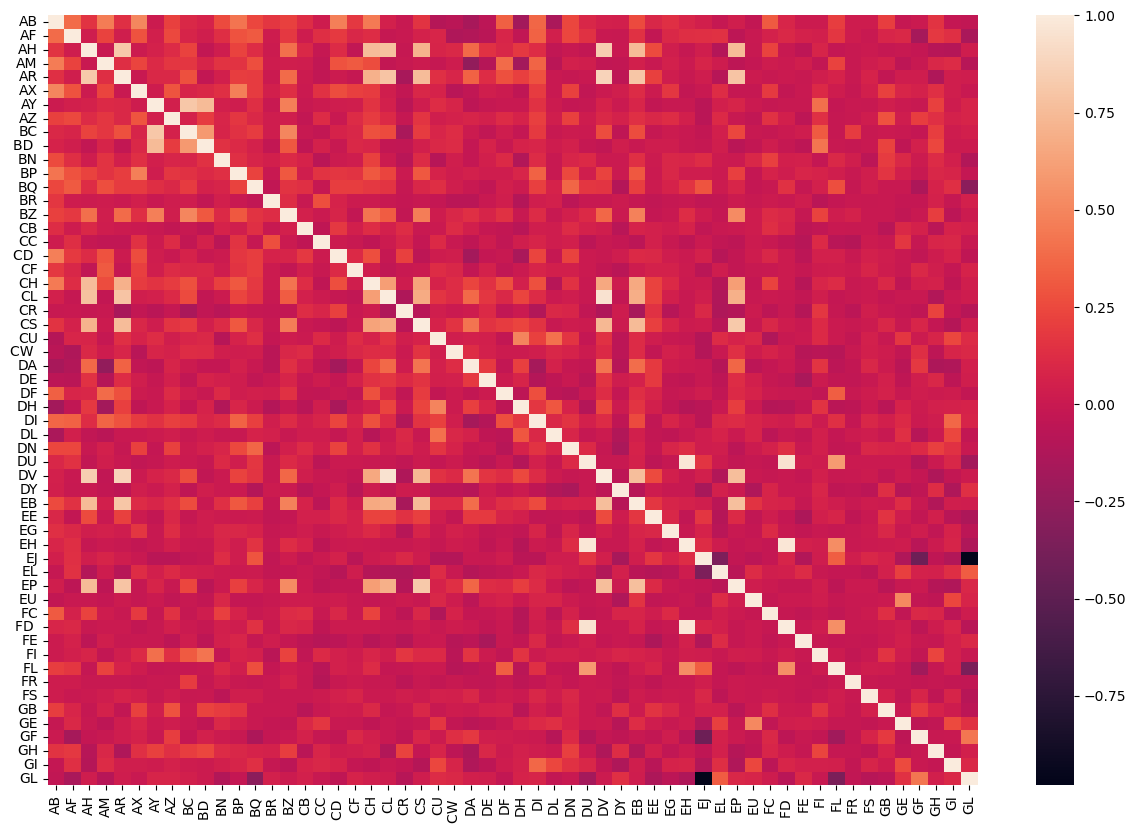

In [10]:
corr = X_train.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Removing Correlated Features
> any feature with correlation coefficient below 0.08 will be deleted

In [11]:
correlated_features = [] 
for i, col in enumerate(list(X_train.select_dtypes(include=[np.number]).columns)):
    corre = y_train.corr(X_train[col])
    if abs(corre) < 0.08:
        X_train = X_train.drop(col, axis = 1)
        correlated_features.append(col)

In [12]:
# X_train = X_train.drop(labels = correlated_features, axis = 1)
X_val = X_val.drop(labels = correlated_features, axis = 1)
X_test = X_test.drop(labels = correlated_features, axis = 1)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 196 to 79
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      493 non-null    float64
 1   AF      493 non-null    float64
 2   AM      493 non-null    float64
 3   AX      493 non-null    float64
 4   AY      493 non-null    float64
 5   BC      493 non-null    float64
 6   BN      493 non-null    float64
 7   BP      493 non-null    float64
 8   BQ      446 non-null    float64
 9   BR      493 non-null    float64
 10  BZ      493 non-null    float64
 11  CC      490 non-null    float64
 12  CD      493 non-null    float64
 13  CF      493 non-null    float64
 14  CR      493 non-null    float64
 15  CU      493 non-null    float64
 16  DA      493 non-null    float64
 17  DE      493 non-null    float64
 18  DH      493 non-null    float64
 19  DI      493 non-null    float64
 20  DL      493 non-null    float64
 21  DU      492 non-null    float64
 22  E

# Filling the Missing Values

In [14]:
imputer = KNNImputer(n_neighbors=10)

for i, col in enumerate(list(X_train.columns)):
    X_train[[col]] = imputer.fit_transform(X_train[[col]])
    X_val[[col]] = imputer.transform(X_val[[col]])
    X_test[[col]] = imputer.transform(X_test[[col]])


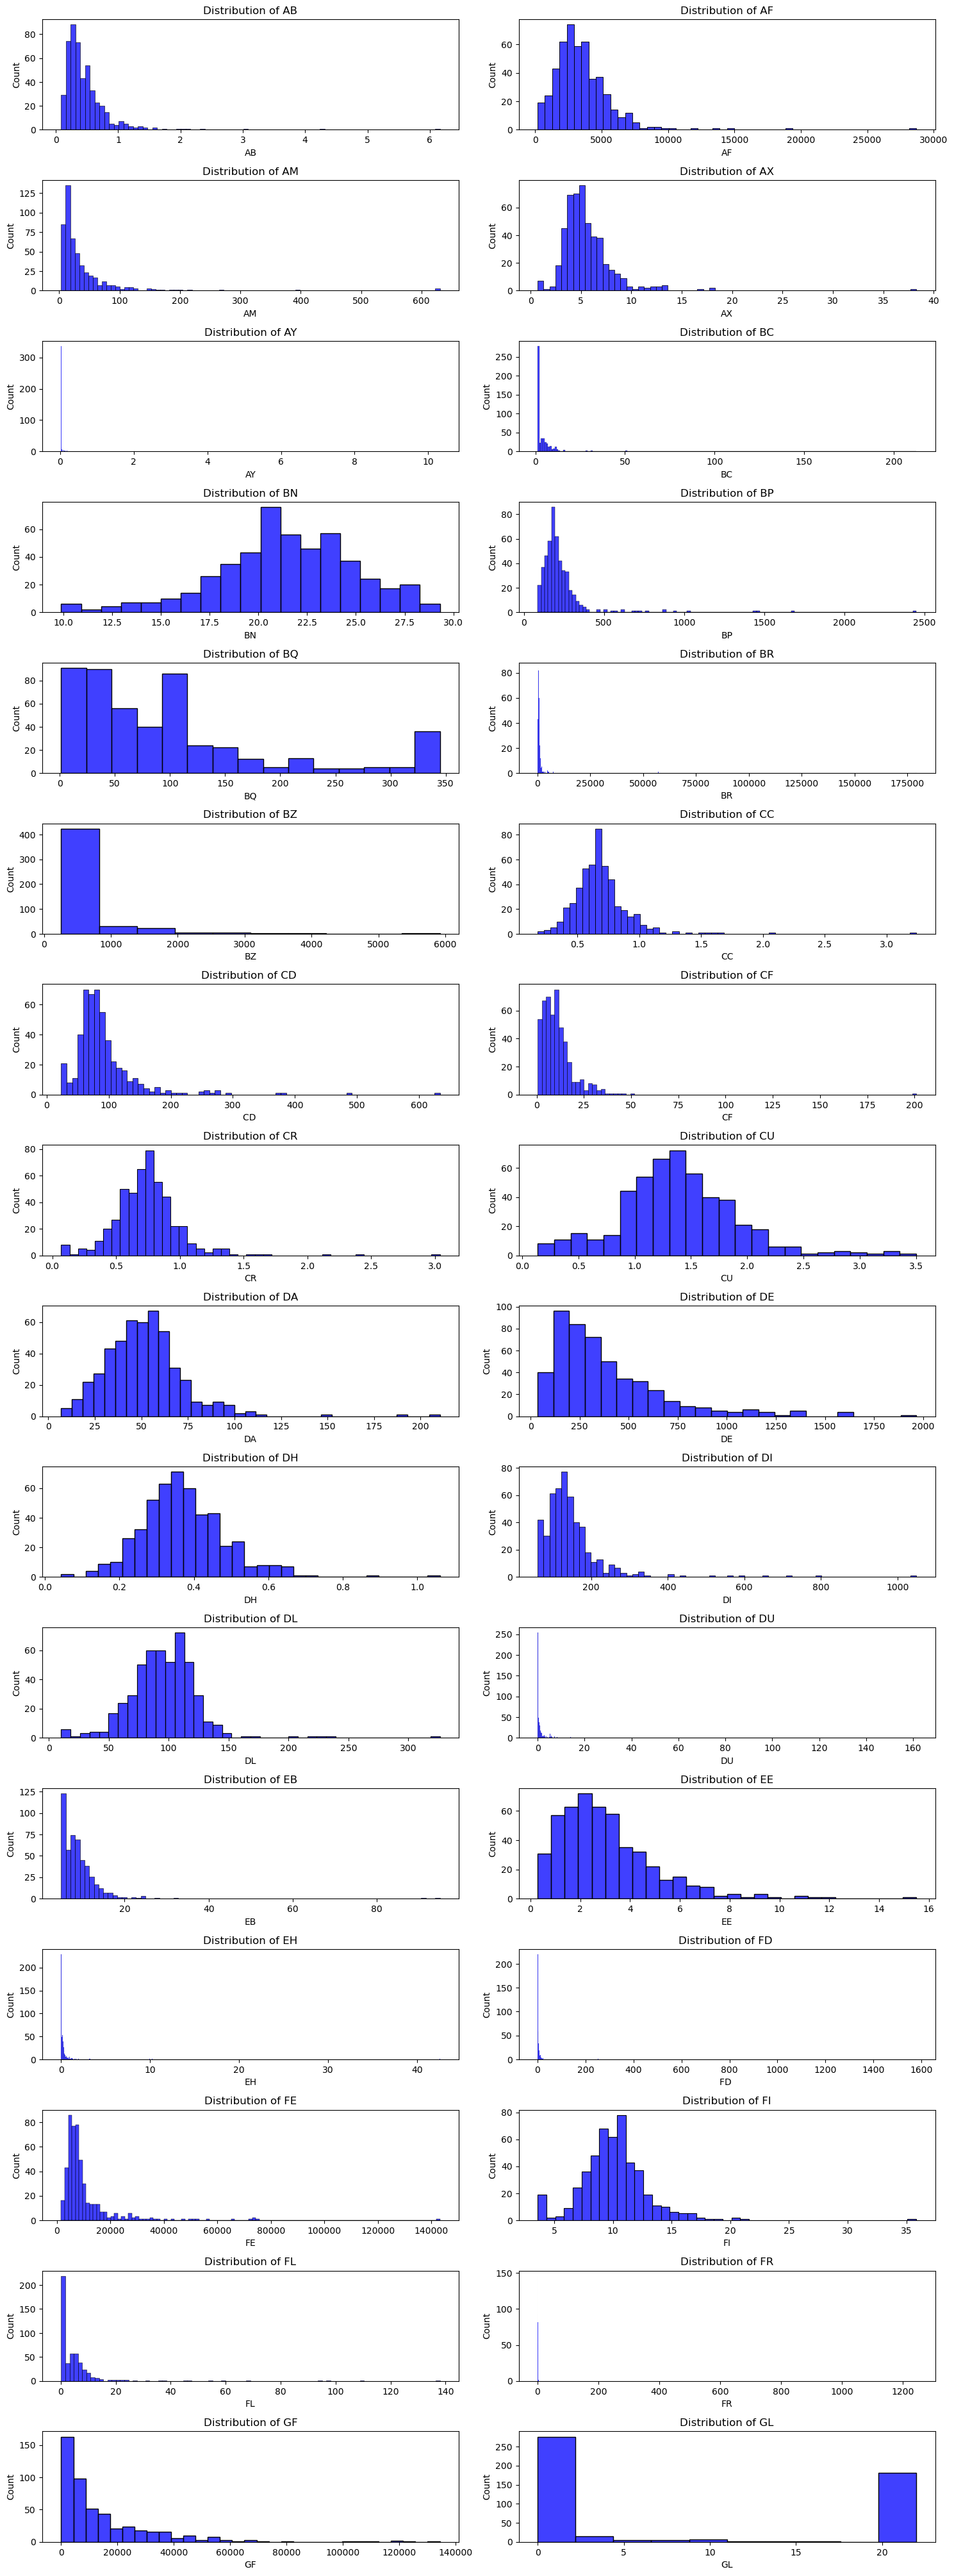

In [15]:
num = list(X_train.select_dtypes(include=[np.number]).columns)

plt.figure(figsize=(15, 80))
for i, col in enumerate(num):
    # Plot distribution 
    plt.subplot(32,2,i+1); sns.histplot(X_train[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

> as we see in the figures above the data containes outiliers and it is skewed 

# Imputing Outliers with Mean and Median

In [16]:
def impute_outliers(df):
    for i, col in enumerate(list(df)):

        median = df[col][~((df[col] - df[col].median()).abs() > 3 * df[col].std())].median()

        # Impute outliers with the median or mean value
        df[col] = df[col].mask(((df[col] - df[col].mean()).abs() > 3 * df[col].std()), median)
        
    return df


In [17]:
X_train = impute_outliers(X_train)
X_val = impute_outliers(X_val)
X_test = impute_outliers(X_test)

# Remove Data Skewness 

In [18]:
pt = PowerTransformer(method='yeo-johnson')

for i, col in enumerate(X_train.columns):  
    X_train[col] = pt.fit_transform(X_train[[col]])
    
    
for i, col in enumerate(X_val.columns):  
    X_val[col] = pt.fit_transform(X_val[[col]])
    
for i, col in enumerate(X_test.columns):  
    X_test[col] = pt.fit_transform(X_test[[col]])

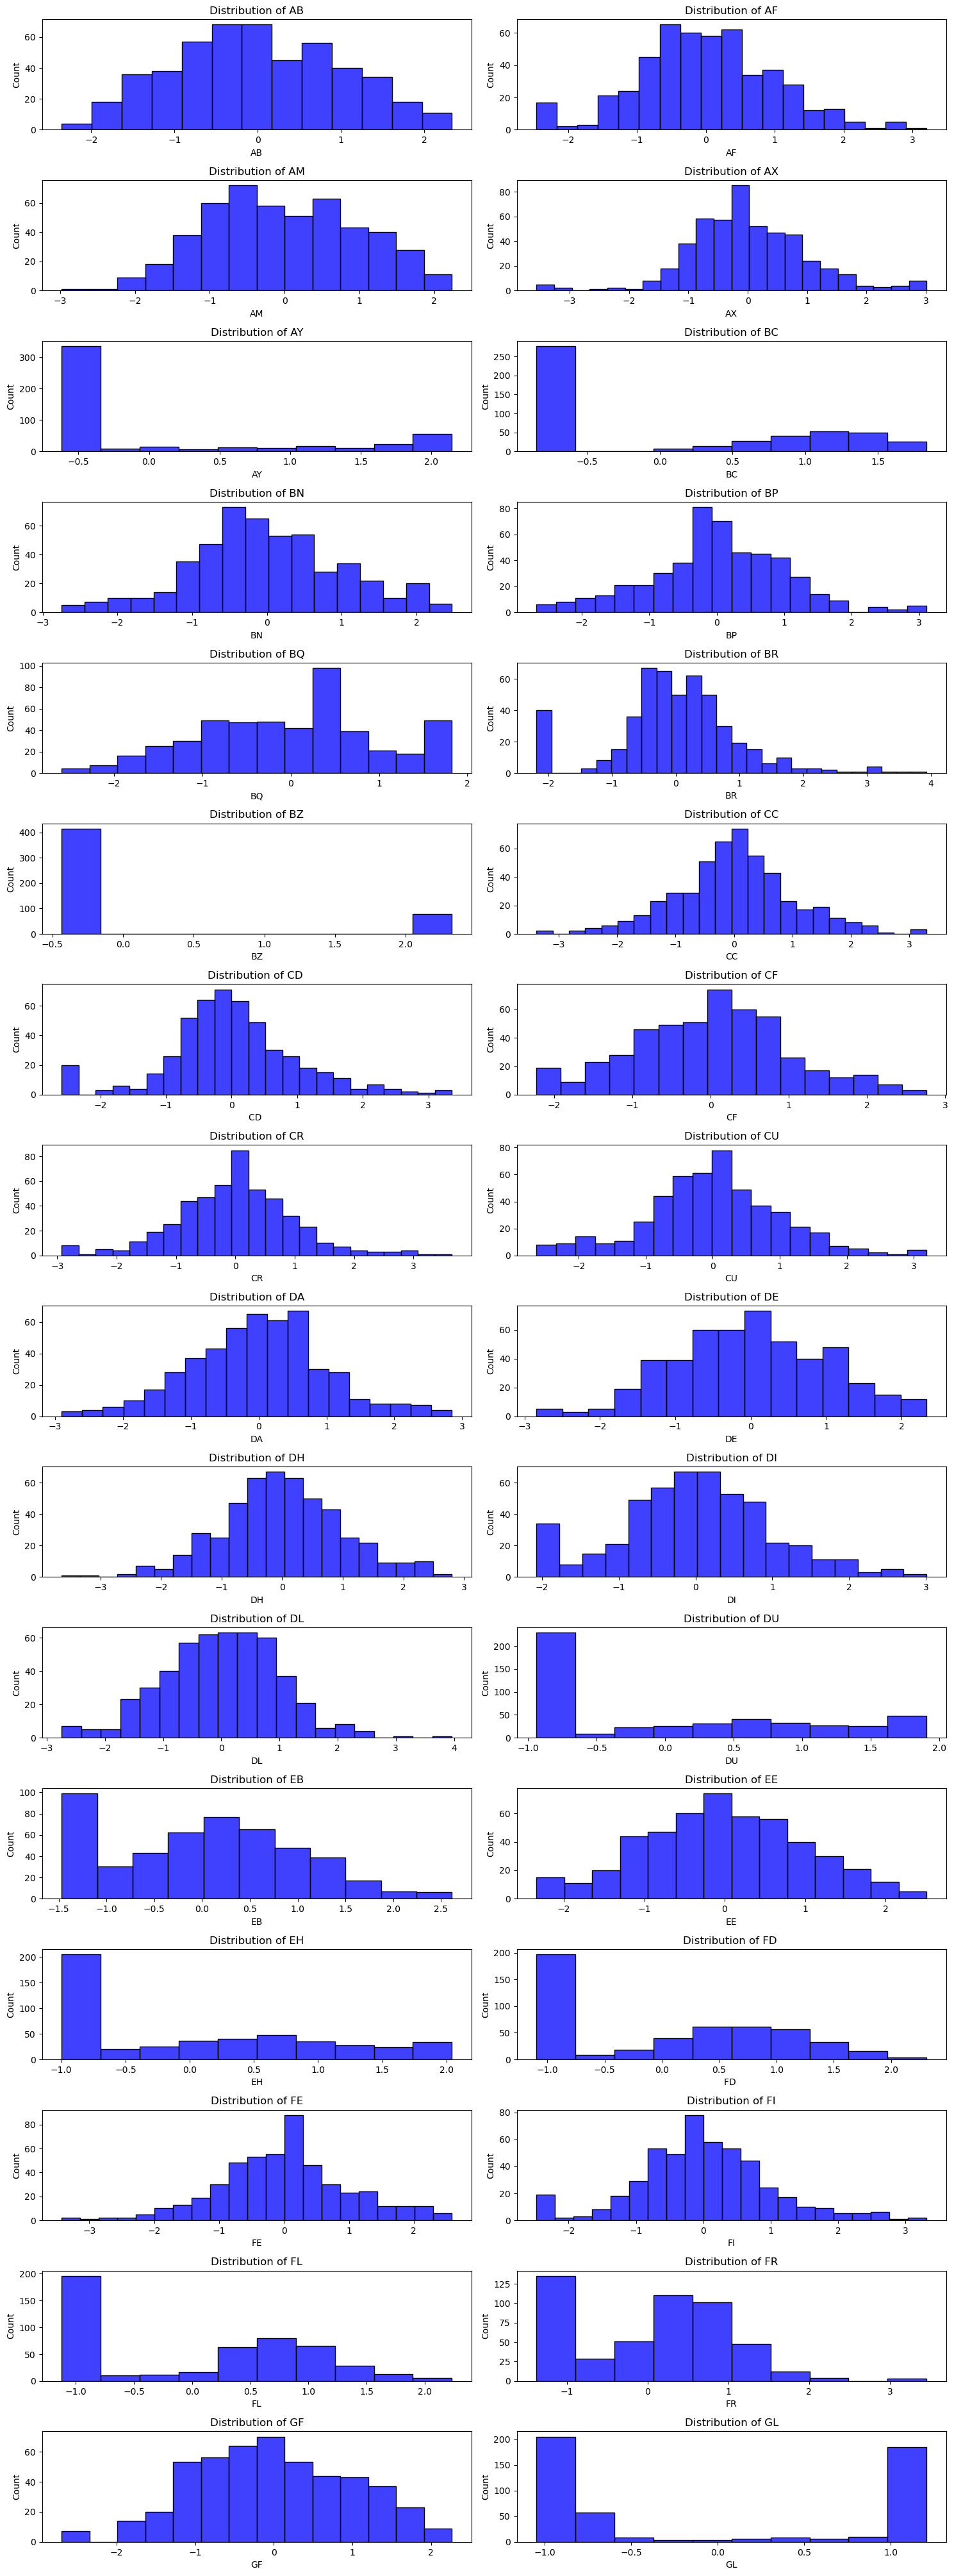

In [19]:
num = list(X_train.select_dtypes(include=[np.number]).columns)

plt.figure(figsize=(15, 80))
for i, col in enumerate(num):
    # Plot distribution 
    plt.subplot(32,2,i+1); sns.histplot(X_train[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

# Modeling

In [20]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV

# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators = 100, scale_pos_weight = 4.71)
k_folds = 5

# Create a StratifiedKFold cross-validation splitter
cv_splitter = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Perform cross-validation and compute the mean accuracy
# cross_val_accuracy = cross_val_score(xgb_classifier, X_train, y_train, cv=cv_splitter, scoring='accuracy')

param_grid = {
    'colsample_bytree': [0.5, 0.8, 1],
    'gamma': [0],
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV with the XGBoost classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=cv_splitter, scoring='accuracy')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1], 'gamma': [0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [500, 1000, 1500]},
             scoring='accuracy')

In [21]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_val)


Best Hyperparameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500}


In [22]:
from sklearn.metrics import log_loss

print ("LOG LOSS : {}".format(log_loss(y_val, y_pred)))
print ("Accuracy : {}".format(best_model.score(X_val,y_val)))

LOG LOSS : 3.488095489269402
Accuracy : 0.9032258064516129


In [23]:
y_test_pred = best_model.predict(X_test)